<h1>human organ classification </h1>
<h2> C-NN model<h3> [end to end model]</h3></h2>

call to packages & libraries

In [12]:
import tensorflow as tf
from tensorflow import keras
from datetime import datetime


from src.sup.evaluation import *
from src.sup.support import *
from src.sup.test_set_eval import *

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten

In [13]:
model_name = "end-to-end"

# Load the TensorBoard notebook extension.
%load_ext tensorboard

# call inline plt.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [9]:
# Clear any logs from previous runs
#!del -rf

Invalid switch - "logs".


callout dataset

In [3]:
classes = ['Heart','Brain','Eye','Kidney','Skull','Other']
root_dir = '../../datasets/'
train_dir = os.path.join(root_dir,'train/')
validation_dir = os.path.join(root_dir,'validation/')
tr_heart_dir,tr_brain_dir,tr_eye_dir,tr_kidney_dir,tr_skull_dir,tr_other_dir = path_update(train_dir,classes)
vl_heart_dir,vl_brain_dir,vl_eye_dir,vl_kidney_dir,vl_skull_dir,vl_other_dir = path_update(validation_dir,classes)

take a glance at training dataset

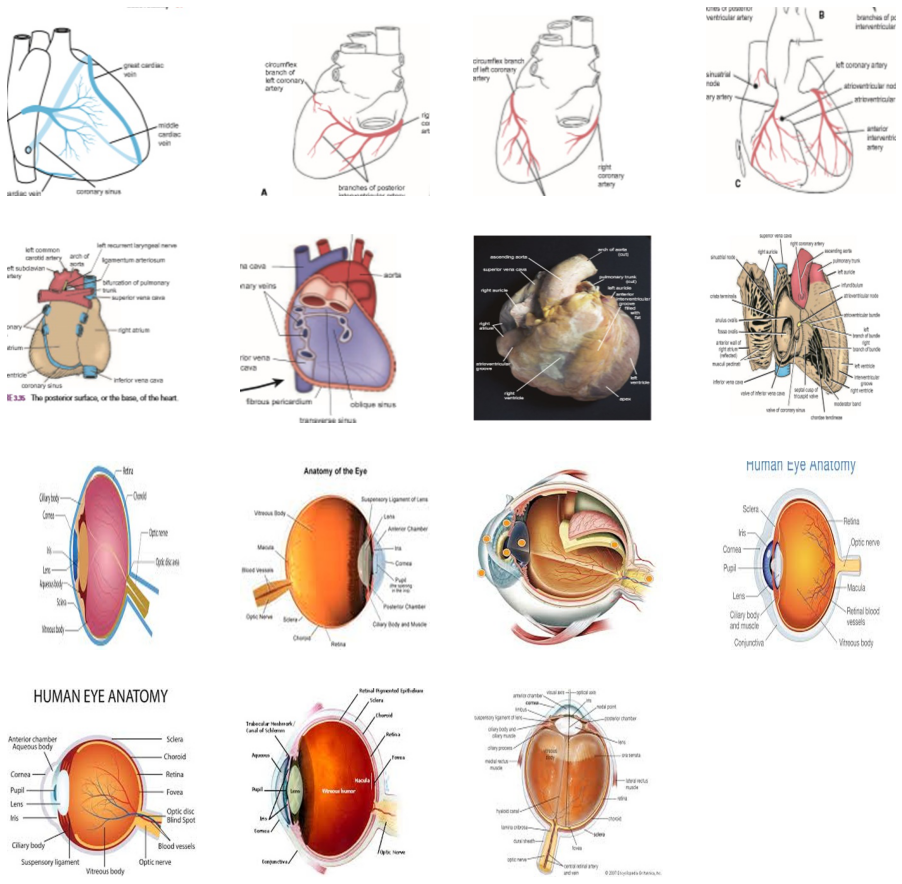

In [10]:
plot_sample_of_img(4,4,path_update(tr_heart_dir,os.listdir(tr_heart_dir))[10:18]+path_update(tr_eye_dir,os.listdir(tr_eye_dir))[12:19])

ImageGenator - autolabelling, and categorizing.

In [4]:
train_gen_tmp = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_gen_tmp = ImageDataGenerator(rescale=1/225.)

train_gen = train_gen_tmp.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size= 20,
                                              shuffle=True,
                                              seed=42)

validation_gen = validation_gen_tmp.flow_from_directory(validation_dir,
                                              target_size=(150,150),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size= 20,
                                              shuffle=True,
                                              seed=42)

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=validation_gen.n//validation_gen.batch_size

clToInt_dict = train_gen.class_indices
clToInt_dict = dict((v,k) for v,k in clToInt_dict.items())

Found 2562 images belonging to 6 classes.
Found 236 images belonging to 6 classes.


define the model

In [6]:
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(6,activation='softmax')
])

compile the model

In [10]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy','categorical_crossentropy'])

save the log

In [8]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

fit & train the model.

In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=validation_gen,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=20,
                              verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 128 steps, validate for 11 steps
Epoch 1/20
128/128 [==============================] - 17s 135ms/step - loss: 1.3876 - accuracy: 0.4697 - categorical_crossentropy: 1.3785 - val_loss: 3.0447 - val_accuracy: 0.3318 - val_categorical_crossentropy: 3.0447

visualize layer process in cnn

In [ ]:
#visualize_model(model,img_path)

instant evaluation

In [ ]:
#call to the tensorboard
%tensorboard --logdir logs
#look at training model performance
acc_n_loss(history)

model.evaluate_generator(validation_gen,
                         steps=STEP_SIZE_VALID)

evaluate the model on test set.

In [ ]:
y_pred,y_test = test_eval(model,classes)
plot_confusion_metrix(y_test,y_pred,classes)
ROC_classes(6,y_test,y_pred,classes)



save the model in .h5 file

In [ ]:
model_path,model_weight_path = save(model,datetime.now()+model_name)

make prediction on random images

In [ ]:
#rnd_predict(model_path,model_weight_path,img_path,clToInt_dict)